In [1]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec
from matplotlib.image import imread
import glob 
import os
import sqlite3
import shutil

### Step #1 : Data Preparation

In [33]:
# Define constants

# Path to the association.db file created during the AP Verify run
db_path = "/home/h/harshit/u/ap_verify_ci_dc2/butler_repo_1024/association.db"
# Name of the table that contains data on dipoles
table_nm = "DiaSource"
# Column name to filter on
column_nm = "isDipole"
# Path to the directory where output images of analysis_ap.plotImageSubtractionCutouts are stored
triplets_root = "/home/h/harshit/public_html/images/"
# Path to the destination directory to save the dipole cutouts
dest_dipoles_dir = "./dipole_cutouts"
# Path to the destination directory to save dipole cutouts with the highest 10 SNR values
dest_dipoles_dir_top_snr = "./dipole_cutouts_demo/"

In [3]:
# A method to read the APDB file and return dipoles
def read_apdb(db_path: str, get_only_dipoles: bool):
    conn = sqlite3.connect(db_path)
    
    # Check if only dipoles are required
    if get_only_dipoles:
        # Read a specific column of a table into a pandas DataFrame
        df = pd.read_sql(f"SELECT * FROM {table_nm} where {column_nm} = 1", conn)
    else:
        df = pd.read_sql(f"SELECT * FROM {table_nm}", conn)
    
    # Close the connection
    conn.close()
    
    return df

In [4]:
# Read the APDB file and return the dipoles
df = read_apdb(db_path = db_path, get_only_dipoles = True)

In [5]:
# A method to validate the supplied image path
def validate_img_path(path:str):
    if os.path.exists(path):
        return path
    return False

In [6]:
# Generate the image path using <diaSourceId> + ".png"
df['image_path'] = df.apply(lambda x: validate_img_path(triplets_root + str(x['diaSourceId']) + ".png"), axis=1)

In [7]:
# Write the output
df.to_csv("dc2_dipoles.csv", index=False)

In [8]:
# A method to validate and copy dipole cutout files from source to destination
def copy_dipole_cutouts(src_path, dest_path):
    if src_path is not False:
        shutil.copy(src_path, dest_path) 

In [9]:
# Copy all the dipoles from the source to the provided destination directory
df.apply(lambda x: copy_dipole_cutouts(x['image_path'], dest_dipoles_dir), axis=1)

0     None
1     None
2     None
3     None
4     None
      ... 
82    None
83    None
84    None
85    None
86    None
Length: 87, dtype: object

In [10]:
# Sort the SNR value in the descending order and pick the top 10 records with the highest SNR
df_top_10_snr = df.sort_values("snr",ascending=False).head(10)

In [11]:
# Write the 10 records with the highest SNR values to a CSV file
df_top_10_snr.to_csv("dc2_dipoles_demo.csv", index=False)

In [12]:
# Copy the corresponding dipole cutouts to a destination directory
df_top_10_snr.apply(lambda x: copy_dipole_cutouts(x['image_path'], dest_dipoles_dir_top_snr), axis=1)

69    None
79    None
63    None
59    None
13    None
67    None
64    None
70    None
30    None
0     None
dtype: object

## Step #2 : Data Analysis

### 2.1 Displaying top 10 cutouts with the highest SNR values

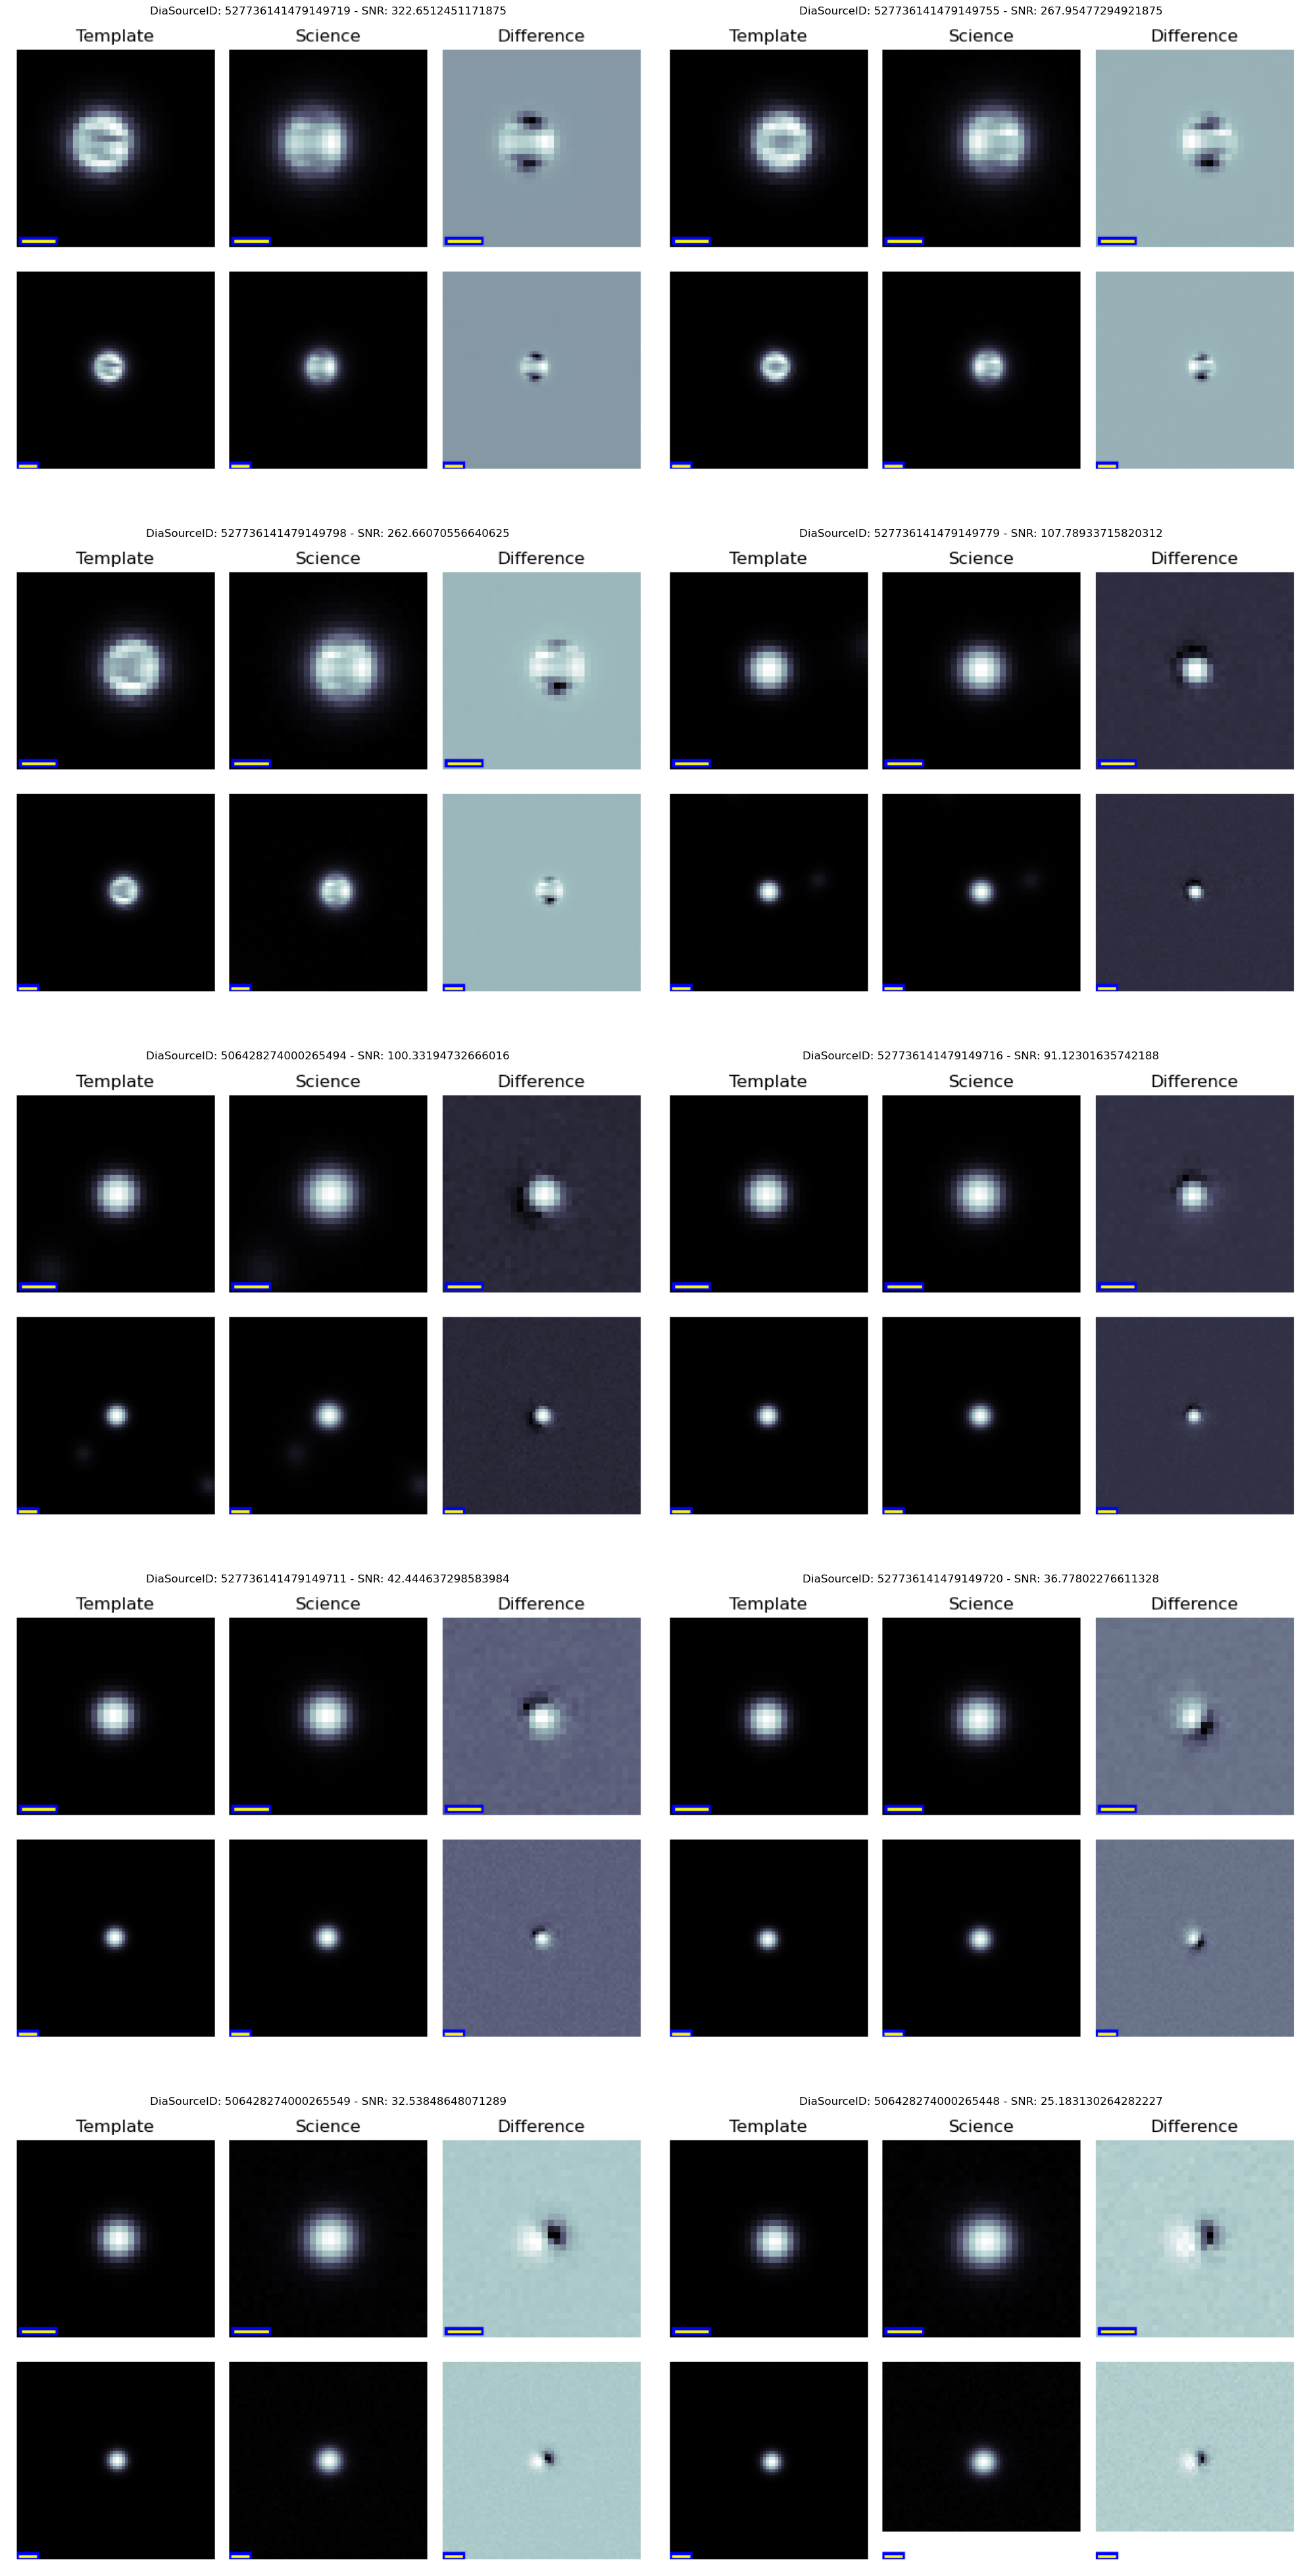

In [13]:
# Plot the top 10 SNR cutouts

# Define the size of your grid
rows = 5
cols = 2

# Create a figure with subplots
fig, axes = plt.subplots(rows, cols, figsize=(20, 40))

# Flatten the array of axes, for easy iteration
axes = axes.flatten()

# Iterate over the rows of the dataframe and the axes simultaneously
for ax, (index, row) in zip(axes, df_top_10_snr.iterrows()):
    # Read the image file
    img = imread(row['image_path'])
    
    # Display the image
    ax.imshow(img)
    
    # Set the title with the filename and snr value
    title = f"DiaSourceID: {row['diaSourceId']} - SNR: {row['snr']}"
    ax.set_title(title)
    
    # Turn off axes to hide ticks and labels
    ax.axis('off')

# Adjust the layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

In [14]:
# Read the dipole CSV file for analysis
df_raw = pd.read_csv("dc2_dipoles.csv")

In [15]:
# Check the top 5 records
df_raw.head()

,diaSourceId,ccdVisitId,diaObjectId,ssObjectId,parentDiaSourceId,ssObjectReassocTime,midpointMjdTai,ra,raErr,dec,...,extendedness,reliability,flags,band,isDipole,time_processed,time_withdrawn,bboxSize,pixelId,image_path
0,506428274000265448,943296168,506428274000265448,0,0,NaN,60961.233092,55.795097,NaN,-32.459185,...,NaN,NaN,8388608,r,1,2023-11-14 01:45:06.861734,NaN,32,9871232029154,/home/h/harshit/public_html/images/50642827400...
1,506428274000265452,943296168,506428274000265452,0,0,NaN,60961.233092,55.689239,NaN,-32.489375,...,NaN,NaN,8388608,r,1,2023-11-14 01:45:06.861734,NaN,25,9871188299625,/home/h/harshit/public_html/images/50642827400...
2,506428274000265456,943296168,506428274000265456,0,0,NaN,60961.233092,55.753320,NaN,-32.456889,...,NaN,NaN,8388608,r,1,2023-11-14 01:45:06.861734,NaN,30,9871185984953,/home/h/harshit/public_html/images/50642827400...
3,506428274000265457,943296168,506428274000265457,0,0,NaN,60961.233092,55.861875,NaN,-32.403034,...,NaN,NaN,0,r,1,2023-11-14 01:45:06.861734,NaN,29,9871231738378,/home/h/harshit/public_html/images/50642827400...
4,506428274000265458,943296168,506428274000265458,0,0,NaN,60961.233092,55.726067,NaN,-32.463067,...,NaN,NaN,8388608,r,1,2023-11-14 01:45:06.861734,NaN,23,9871189081250,/home/h/harshit/public_html/images/50642827400...


In [16]:
# Keep only required columns
dipole_data = df_raw[["diaSourceId", "snr", "isDipole"]]

### 2.1 Number of Dipoles v/s Various SNR Bin Sizes

/tmp/ipykernel_4486/3116945159.py:22: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


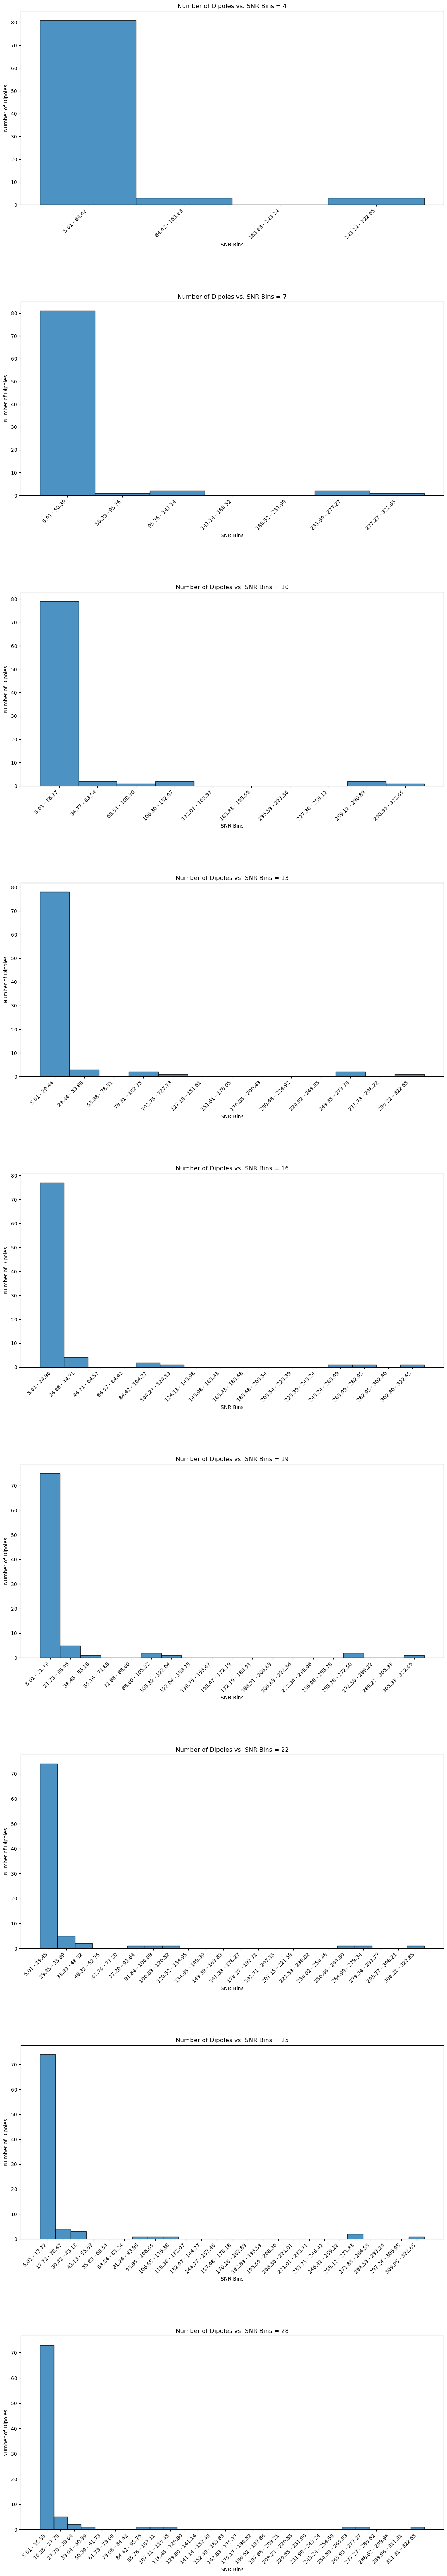

In [17]:
bin_ranges = list(range(5, 31, 3))

# Create a large figure
fig = plt.figure(figsize=(15, len(bin_ranges) * 10))

# Create a gridspec for the plots
gs = gridspec.GridSpec(len(bin_ranges), 1, hspace=0.5)

for idx, bin_c in enumerate(bin_ranges):
    bins = np.linspace(dipole_data['snr'].min(), dipole_data['snr'].max(), bin_c)
    labels = [f"{bins[i]:.2f} - {bins[i+1]:.2f}" for i in range(len(bins)-1)]
    
    ax = fig.add_subplot(gs[idx])
    ax.hist(dipole_data['snr'], bins=bins, edgecolor='black', alpha=0.8, align='left')
    
    ax.set_xticks(bins[:-1])
    ax.set_xticklabels(labels, rotation=45, ha='right')
    ax.set_xlabel('SNR Bins')
    ax.set_ylabel('Number of Dipoles')
    ax.set_title(f'Number of Dipoles vs. SNR Bins = {bin_c-1}')

plt.tight_layout()
plt.savefig('dipoles_vs_snr_bins.png', dpi=300)  # Save the combined figure as an image
plt.show()


### 2.2 Percentage of diPoles vs. SNR bins

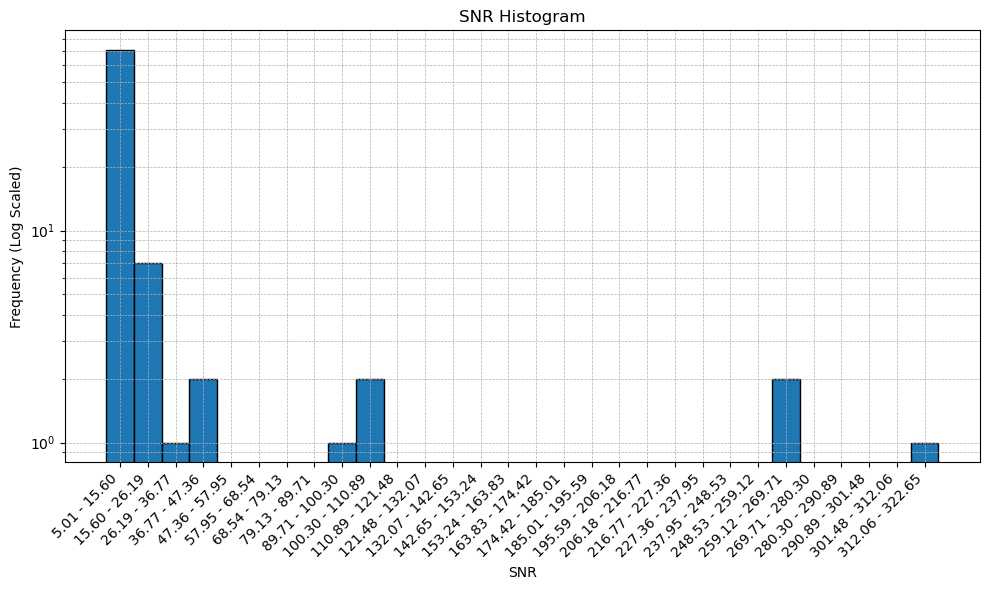

In [18]:
plt.figure(figsize=(10, 6))
hist, bins, _ = plt.hist(df['snr'], bins=30, edgecolor='k', align="left")
plt.xlabel('SNR')
plt.xticks(ticks=bins[:-1], labels=[f"{bins[i]:.2f} - {bins[i+1]:.2f}" for i in range(len(bins)-1)], rotation=45, ha="right")
plt.ylabel('Frequency (Log Scaled)')
plt.title('SNR Histogram')
plt.yscale('log')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.savefig('snr_histogram.png', dpi=300)
plt.show()

/tmp/ipykernel_4486/3701029060.py:13: RuntimeWarning: invalid value encountered in divide
  percentage_dipoles = np.where(total == 0, 0, (dipoles_hist / total) * 100)
/tmp/ipykernel_4486/3701029060.py:14: RuntimeWarning: invalid value encountered in divide
  percentage_non_dipoles = np.where(total == 0, 0, (non_dipoles_hist / total) * 100)


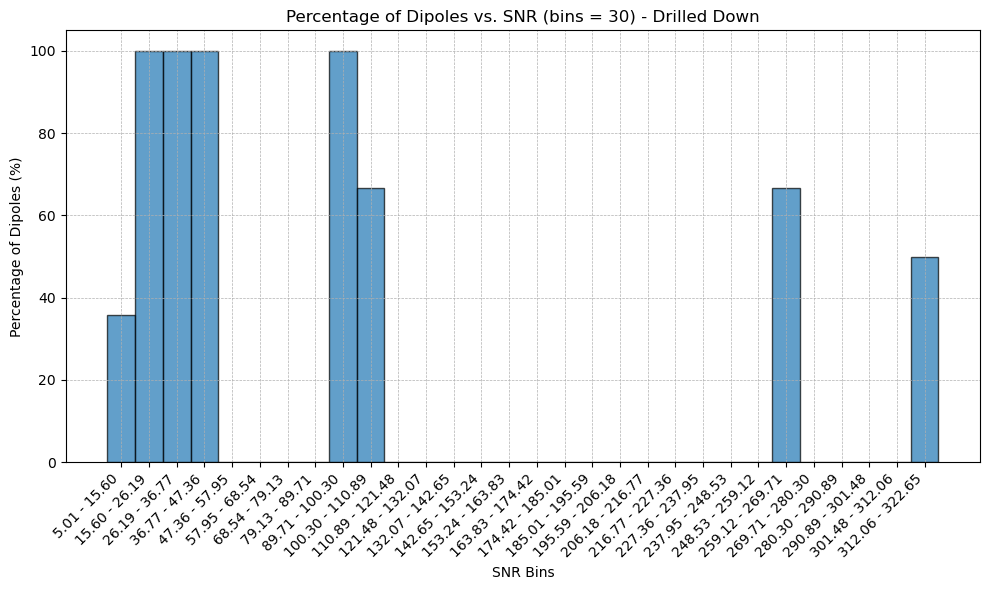

In [34]:
# Drill down on dipoles
# For this analysis, we need all the records- dipoles and non-dipoles
df = read_apdb(db_path = db_path, get_only_dipoles = False)

# Calculate the max SNR value for a dipoles
max_snr_for_dipole = df[df['isDipole']==1]['snr'].max()

# Get histograms for dipoles and non-dipoles
dipoles_hist, _ = np.histogram(df[df['isDipole'] == 1]['snr'], bins=bins)
non_dipoles_hist, _ = np.histogram(df[df['isDipole'] == 0]['snr'], bins=bins)
# Calculate the percentage for each bin
total = dipoles_hist + non_dipoles_hist
percentage_dipoles = np.where(total == 0, 0, (dipoles_hist / total) * 100)
percentage_non_dipoles = np.where(total == 0, 0, (non_dipoles_hist / total) * 100)
    
# Plotting
plt.figure(figsize=(10, 6))
plt.bar(bins[:-1], percentage_dipoles, width=np.diff(bins)[0], align='center', edgecolor='black', alpha=0.7)
plt.xticks(ticks=bins[:-1], labels=[f"{bins[i]:.2f} - {bins[i+1]:.2f}" for i in range(len(bins)-1)], rotation=45, ha='right')
plt.xlabel('SNR Bins')
plt.ylabel('Percentage of Dipoles (%)')
plt.title('Percentage of Dipoles vs. SNR (bins = 30) - Drilled Down')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()  # This ensures that x-axis labels fit properly
plt.savefig('percent_dipoles_vs_snr_drilldown.png', dpi=300)
plt.show()

The above graph shows a more detailed/drilled-down version of the occurance of dipoles for various SNR values